In [1]:
import numpy as npp
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from SimplePolicyNetwork import SimplePolicyNetwork
from SimpleRLPolicyGradientSolver import SimpleRLPolicyGradientSolver
from simpleBox import simpleBox
from SimRat import SimRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

MySQLdb not found
Using mysql.connector


In [2]:
weight_file = "good_weights/good_weights"
loaded_params = load_weights(weight_file+"4.pkl")

Episode 100 complete (0.01s), loss: 2.90066245595, reward: 0, running reward: 0.393751162925
Episode 200 complete (0.01s), loss: 8.55999458436, reward: 4, running reward: 0.863283631679
Episode 300 complete (0.01s), loss: 7.48903000201, reward: 4, running reward: 1.37742631737
Episode 400 complete (0.01s), loss: 1.97311664433, reward: 4, running reward: 1.81971011883
Episode 500 complete (0.01s), loss: 1.03602886772, reward: 2, running reward: 2.44925641503
Episode 600 complete (0.01s), loss: 1.26559523378, reward: 2, running reward: 2.64847799714
Episode 700 complete (0.01s), loss: 1.68377971179, reward: 4, running reward: 2.96678734098
Episode 800 complete (0.02s), loss: 0.861796439353, reward: 4, running reward: 2.84185420443
Episode 900 complete (0.01s), loss: 7.32511313019, reward: 2, running reward: 2.96172466016
Episode 100 complete (0.01s), loss: 15.5132259485, reward: 4, running reward: 0.750205651899
Episode 200 complete (0.01s), loss: 14.1734280639, reward: 0, running reward

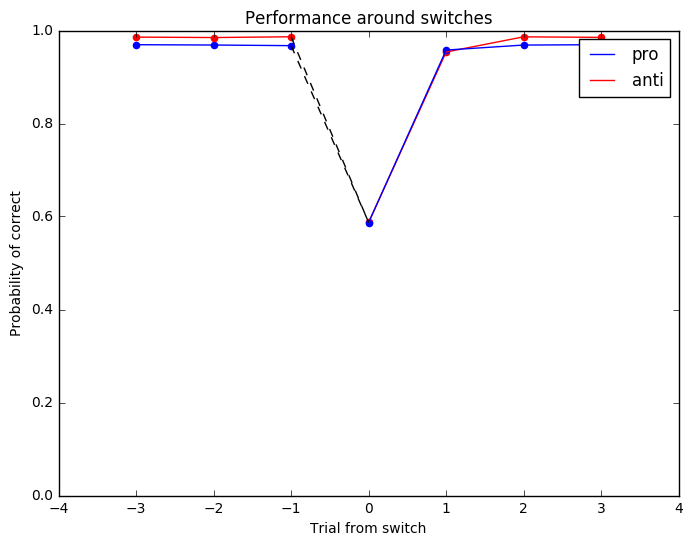

In [11]:
box = simpleBox(mode="alternative",length=10000,block_size=100,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
rats = {}
for i in range(5):
    model = SimplePolicyNetwork(hidden_dim=5,reg=0)
    box = simpleBox(mode="pro_only",length=10000,block_size=100,random_range=0,
                    trial_per_episode=5, repeat = True, reward_ratio = 1)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.01,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=50,
                                        verbose=False,
                                        supervised = False,
                                        print_every=100)
    solver.load_params(loaded_params)
    solver.train()

    box.change_mode("anti_only")
    solver.change_settings(learning_rate=0.01,num_episodes=50)
    solver.train()

    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.01,num_episodes=1000)
    solver.train()
    
    rat = SimRat(model)
    probs = rat.predict(val_X,val_y)
    ratname = 'VirtualRat'+str(i)
    rats[ratname] = rat
    
trial_window = 3
p2a_mean, a2p_mean = meanPerformance(rats, trial_window = 3)
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(p2a_mean, a2p_mean, trial_window = 3)

Episode 100 complete (0.01s), loss: 8.59919433796, reward: 2, running reward: 0.879915126644
Episode 200 complete (0.01s), loss: 5.66132647692, reward: 2, running reward: 1.19618226963
Episode 300 complete (0.01s), loss: -20.4762499354, reward: 0, running reward: 1.55990143039
Episode 400 complete (0.01s), loss: 11.9264843843, reward: 4, running reward: 2.15549399583
Episode 500 complete (0.01s), loss: 6.89484351299, reward: 2, running reward: 2.79424033401
Episode 600 complete (0.01s), loss: 27.74063392, reward: 0, running reward: 2.89290577476
Episode 700 complete (0.01s), loss: 1.78492779132, reward: 4, running reward: 3.01696418817
Episode 800 complete (0.01s), loss: 1.42130502128, reward: 4, running reward: 3.09321242894
Episode 900 complete (0.01s), loss: 0.930678338312, reward: 4, running reward: 3.14484380825
Episode 100 complete (0.01s), loss: 0.0575160424786, reward: 0, running reward: 0.541967861758
Episode 200 complete (0.01s), loss: 6.51165222769, reward: 2, running reward

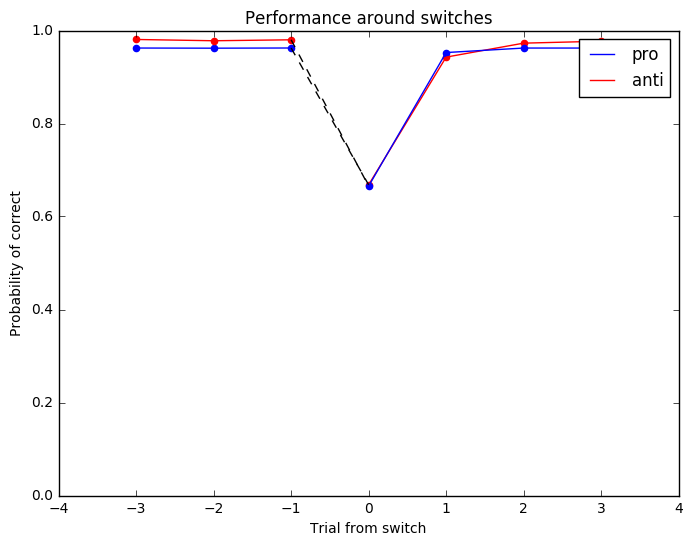

In [3]:
box = simpleBox(mode="alternative",length=10000,block_size=50,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
rats = {}
for i in range(5):
    model = SimplePolicyNetwork(hidden_dim=5,reg=0)
    box = simpleBox(mode="pro_only",length=10000,block_size=50,random_range=0,
                    trial_per_episode=5, repeat = True, reward_ratio = 1)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.01,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=50,
                                        verbose=False,
                                        supervised = False,
                                        print_every=100)
    solver.load_params(loaded_params)
    solver.train()

    box.change_mode("anti_only")
    solver.change_settings(learning_rate=0.01,num_episodes=50)
    solver.train()

    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.01,num_episodes=1000)
    solver.train()
    
    rat = SimRat(model)
    probs = rat.predict(val_X,val_y)
    ratname = 'VirtualRat'+str(i)
    rats[ratname] = rat
    
trial_window = 3
p2a_mean, a2p_mean = meanPerformance(rats, trial_window = 3)
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(p2a_mean, a2p_mean, trial_window = 3)

Episode 100 complete (0.01s), loss: -3.89374071582, reward: 0, running reward: -0.472919122186
Episode 200 complete (0.04s), loss: -15.8721614501, reward: -2, running reward: 0.394311263814
Episode 300 complete (0.02s), loss: 10.0920301844, reward: 4, running reward: 1.14475533453
Episode 400 complete (0.01s), loss: 9.3943334027, reward: 4, running reward: 1.93401048705
Episode 500 complete (0.01s), loss: 13.0379653619, reward: 4, running reward: 2.49546175319
Episode 600 complete (0.01s), loss: 13.7887339638, reward: 4, running reward: 3.00099884386
Episode 700 complete (0.01s), loss: 6.70000886632, reward: 2, running reward: 3.28673096259
Episode 800 complete (0.01s), loss: 1.29194369636, reward: 4, running reward: 3.51670167151
Episode 900 complete (0.02s), loss: 19.1639014737, reward: 2, running reward: 3.53176427635
Episode 100 complete (0.01s), loss: 14.4540385116, reward: 4, running reward: 0.252977027007
Episode 200 complete (0.01s), loss: 13.0182787071, reward: 4, running rewa

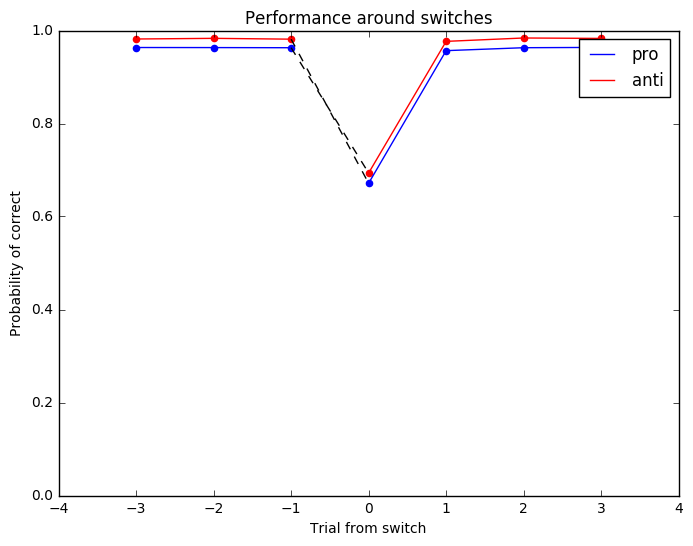

In [7]:
box = simpleBox(mode="alternative",length=10000,block_size=30,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
rats = {}
for i in range(5):
    model = SimplePolicyNetwork(hidden_dim=5,reg=0)
    box = simpleBox(mode="pro_only",length=10000,block_size=30,random_range=0,
                    trial_per_episode=5, repeat = True, reward_ratio = 1)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.01,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=50,
                                        verbose=False,
                                        supervised = False,
                                        print_every=100)
    solver.load_params(loaded_params)
    solver.train()

    box.change_mode("anti_only")
    solver.change_settings(learning_rate=0.01,num_episodes=50)
    solver.train()

    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.01,num_episodes=1000)
    solver.train()
    
    rat = SimRat(model)
    probs = rat.predict(val_X,val_y)
    ratname = 'VirtualRat'+str(i)
    rats[ratname] = rat
    
trial_window = 3
p2a_mean, a2p_mean = meanPerformance(rats, trial_window = 3)
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(p2a_mean, a2p_mean, trial_window = 3)

Episode 100 complete (0.01s), loss: -13.8992046648, reward: 0, running reward: 0.124842202545
Episode 200 complete (0.01s), loss: 7.31095114956, reward: 4, running reward: 0.979775972608
Episode 300 complete (0.01s), loss: 4.70084338206, reward: 4, running reward: 1.79927334879
Episode 400 complete (0.02s), loss: 2.61665886799, reward: 4, running reward: 2.47031462082
Episode 500 complete (0.01s), loss: 5.38972127997, reward: 4, running reward: 2.80993053928
Episode 600 complete (0.02s), loss: 2.37590598616, reward: 4, running reward: 3.1311888906
Episode 700 complete (0.02s), loss: 1.1055177963, reward: 4, running reward: 3.52663093826
Episode 800 complete (0.02s), loss: 2.43120610377, reward: 4, running reward: 3.55204747324
Episode 900 complete (0.02s), loss: 0.750577553946, reward: 4, running reward: 3.70982902049
Episode 100 complete (0.01s), loss: -5.20524340607, reward: 0, running reward: 0.517034430017
Episode 200 complete (0.01s), loss: 14.420701092, reward: 4, running reward:

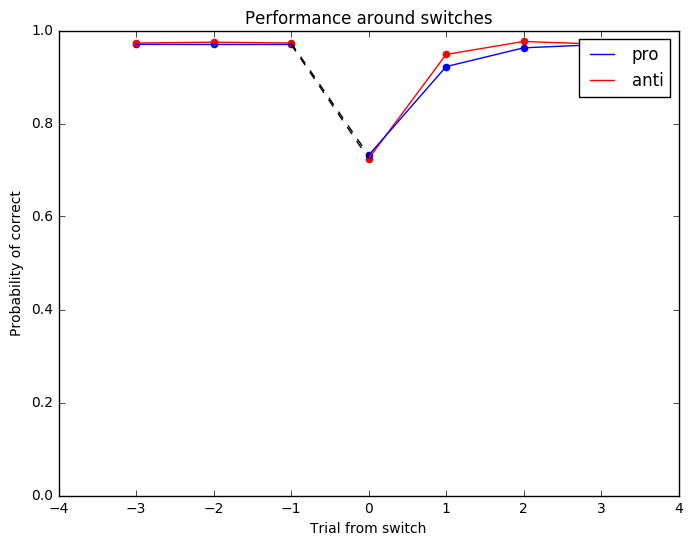

In [13]:
box = simpleBox(mode="alternative",length=10000,block_size=20,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
rats = {}
for i in range(5):
    model = SimplePolicyNetwork(hidden_dim=5,reg=0)
    box = simpleBox(mode="pro_only",length=10000,block_size=20,random_range=0,
                    trial_per_episode=5, repeat = True, reward_ratio = 1)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.01,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=50,
                                        verbose=False,
                                        supervised = False,
                                        print_every=100)
    solver.load_params(loaded_params)
    solver.train()

    box.change_mode("anti_only")
    solver.change_settings(learning_rate=0.01,num_episodes=50)
    solver.train()

    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.01,num_episodes=1000)
    solver.train()
    
    rat = SimRat(model)
    probs = rat.predict(val_X,val_y)
    ratname = 'VirtualRat'+str(i)
    rats[ratname] = rat
    
trial_window = 3
p2a_mean, a2p_mean = meanPerformance(rats, trial_window = 3)
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(p2a_mean, a2p_mean, trial_window = 3)

Episode 100 complete (0.01s), loss: -0.0576293992301, reward: 0, running reward: 0.453221885335
Episode 200 complete (0.01s), loss: 4.41424154548, reward: 4, running reward: 0.798999566496
Episode 300 complete (0.01s), loss: -5.32780914054, reward: 0, running reward: 1.55200548818
Episode 400 complete (0.01s), loss: 3.50752826736, reward: 4, running reward: 2.1595397335
Episode 500 complete (0.02s), loss: 1.8147031272, reward: 2, running reward: 2.68746640723
Episode 600 complete (0.02s), loss: 1.23384980479, reward: 2, running reward: 2.98845088311
Episode 700 complete (0.01s), loss: 1.27982142444, reward: 4, running reward: 3.14828034996
Episode 800 complete (0.02s), loss: 2.09669523946, reward: 4, running reward: 3.25136166642
Episode 900 complete (0.01s), loss: 13.8428859828, reward: 2, running reward: 3.50032058468
Episode 100 complete (0.01s), loss: -0.0572432532314, reward: 0, running reward: 0.55861250913
Episode 200 complete (0.01s), loss: 13.9196631215, reward: 4, running rew

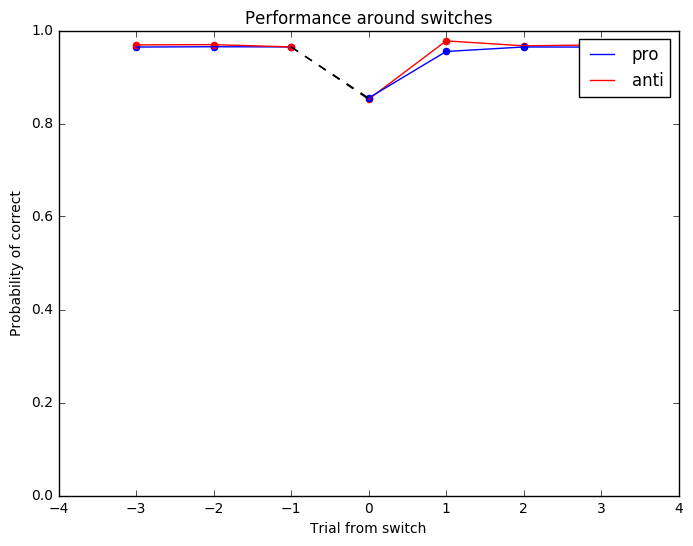

In [8]:
box = simpleBox(mode="alternative",length=10000,block_size=15,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
rats = {}
for i in range(5):
    model = SimplePolicyNetwork(hidden_dim=5,reg=0)
    box = simpleBox(mode="pro_only",length=10000,block_size=15,random_range=0,
                    trial_per_episode=5, repeat = True, reward_ratio = 1)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.01,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=50,
                                        verbose=False,
                                        supervised = False,
                                        print_every=100)
    solver.load_params(loaded_params)
    solver.train()

    box.change_mode("anti_only")
    solver.change_settings(learning_rate=0.01,num_episodes=50)
    solver.train()

    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.01,num_episodes=1000)
    solver.train()
    
    rat = SimRat(model)
    probs = rat.predict(val_X,val_y)
    ratname = 'VirtualRat'+str(i)
    rats[ratname] = rat
    
trial_window = 3
p2a_mean, a2p_mean = meanPerformance(rats, trial_window = 3)
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(p2a_mean, a2p_mean, trial_window = 3)

Episode 100 complete (0.01s), loss: 15.2999481453, reward: 2, running reward: -0.28903719096
Episode 200 complete (0.01s), loss: 15.0433905819, reward: 2, running reward: 0.63692399019
Episode 300 complete (0.01s), loss: 8.60260558242, reward: 4, running reward: 1.44456461446
Episode 400 complete (0.01s), loss: 8.29217250885, reward: 2, running reward: 2.24522239097
Episode 500 complete (0.01s), loss: -48.2485056553, reward: -2, running reward: 2.42826553604
Episode 600 complete (0.01s), loss: 7.96840699728, reward: 4, running reward: 2.78535439976
Episode 700 complete (0.01s), loss: 3.18960352057, reward: 4, running reward: 3.08088158283
Episode 800 complete (0.01s), loss: 2.88746651562, reward: 4, running reward: 3.36368480637
Episode 900 complete (0.01s), loss: 2.62364952131, reward: 4, running reward: 3.52249393366
Episode 100 complete (0.01s), loss: -36.0592571759, reward: -2, running reward: 0.316002512299
Episode 200 complete (0.01s), loss: 11.3988113492, reward: 0, running rewa

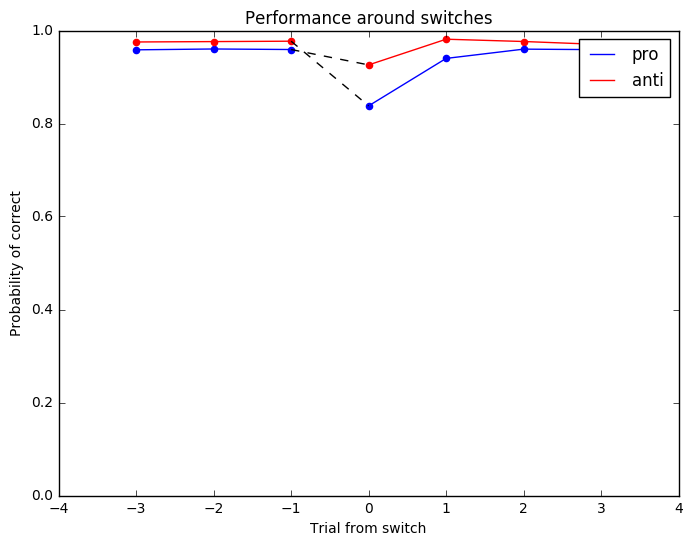

In [15]:
box = simpleBox(mode="alternative",length=10000,block_size=10,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
rats = {}
for i in range(5):
    model = SimplePolicyNetwork(hidden_dim=5,reg=0)
    box = simpleBox(mode="pro_only",length=10000,block_size=10,random_range=0,
                    trial_per_episode=5, repeat = True, reward_ratio = 1)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.01,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=50,
                                        verbose=False,
                                        supervised = False,
                                        print_every=100)
    solver.load_params(loaded_params)
    solver.train()

    box.change_mode("anti_only")
    solver.change_settings(learning_rate=0.01,num_episodes=50)
    solver.train()

    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.01,num_episodes=1000)
    solver.train()
    
    rat = SimRat(model)
    probs = rat.predict(val_X,val_y)
    ratname = 'VirtualRat'+str(i)
    rats[ratname] = rat
    
trial_window = 3
p2a_mean, a2p_mean = meanPerformance(rats, trial_window = 3)
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(p2a_mean, a2p_mean, trial_window = 3)

Episode 100 complete (0.01s), loss: -22.0255170571, reward: -4, running reward: -0.0865016573408
Episode 200 complete (0.01s), loss: -20.6008652599, reward: -2, running reward: 0.346431285214
Episode 300 complete (0.01s), loss: 17.0465903284, reward: 2, running reward: 1.26738165398
Episode 400 complete (0.02s), loss: 8.19852148158, reward: 4, running reward: 2.13525280993
Episode 500 complete (0.01s), loss: 3.04124702218, reward: 4, running reward: 2.95809881587
Episode 600 complete (0.01s), loss: 11.8087344306, reward: 2, running reward: 3.17773831589
Episode 700 complete (0.01s), loss: -17.458177896, reward: 0, running reward: 3.25866413535
Episode 800 complete (0.01s), loss: 4.80297123233, reward: 4, running reward: 3.29197328639
Episode 900 complete (0.01s), loss: 1.32265484285, reward: 4, running reward: 3.48566421001
Episode 1000 complete (0.01s), loss: 5.95023198415, reward: 2, running reward: 3.67909315942
Episode 1100 complete (0.01s), loss: 1.0533090144, reward: 4, running r

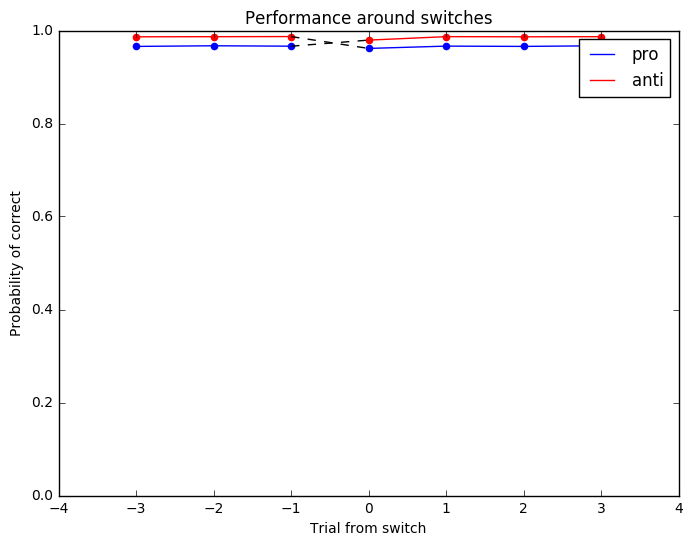

In [14]:
box = simpleBox(mode="alternative",length=10000,block_size=5,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
rats = {}
for i in range(5):
    model = SimplePolicyNetwork(hidden_dim=5,reg=0)
    box = simpleBox(mode="pro_only",length=10000,block_size=5,random_range=0,
                    trial_per_episode=5, repeat = True, reward_ratio = 1)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.01,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=50,
                                        verbose=False,
                                        supervised = False,
                                        print_every=100)
    solver.load_params(loaded_params)
    solver.train()

    box.change_mode("anti_only")
    solver.change_settings(learning_rate=0.01,num_episodes=50)
    solver.train()

    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.01,num_episodes=1200)
    solver.train()
    
    rat = SimRat(model)
    probs = rat.predict(val_X,val_y)
    ratname = 'VirtualRat'+str(i)
    rats[ratname] = rat
    
trial_window = 3
p2a_mean, a2p_mean = meanPerformance(rats, trial_window = 3)
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(p2a_mean, a2p_mean, trial_window = 3)

In [ ]:
# Code for generating good intial parameters.
init_params = []
for i in range(30):
    print
    print "Number %d" % (i,)
    model = SimplePolicyNetwork(hidden_dim=5,reg=0)
    box = simpleBox(mode="pro_only",length=50000,block_size=30,random_range=0,trial_per_episode=5,
                    repeat = True, reward_ratio = 5)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.01,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=50,
                                        verbose=False,
                                        supervised = False,
                                        print_every=100)
    solver.init()
    init_params.append(solver.save_params())
    solver.train()

    box.change_mode("anti_only")
    solver.change_settings(learning_rate=0.01,num_episodes=50)
    solver.train()

    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.01,num_episodes=2000)
    solver.train()

    solver.change_settings(learning_rate=0.005,num_episodes=1000)
    solver.train()
    
    rat = SimRat(model)
    box.change_mode("alternative")
    probs = rat.predict(box.X,box.y)
    ratname = 'VirtualRat'
    loss_history(solver, ratname)
    sample_probabilities(probs, ratname, sample = 100)
    sample_correct_rate(rat, sample = 100)
    trial_window = 3
    np.set_printoptions(precision=2)
    plt.ylim([0,1])
    draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)

In [ ]:
weight_file = "good_weights/good_weights"
suffix = ".pkl"
good_list = []
i=0
for index in good_list:
    i+=1
    save_weights(weight_file+str(i)+suffix, init_params[index])